REGRESSÃO LOGISTICA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LG_data/DESAFIO02/defects_data.csv')
data.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [ ]:
X = data.drop('severity', axis=1)
y = data['severity']

In [ ]:
print(X.columns)
print(numeral_columns)
print(categorical_columns)


Index(['defect_id', 'product_id', 'defect_type', 'defect_date',
       'defect_location', 'inspection_method', 'repair_cost'],
      dtype='object')


NameError: name 'numeral_columns' is not defined

In [ ]:
print(X[numeral_columns].dtypes)


defect_id        int64
product_id       int64
repair_cost    float64
dtype: object


In [ ]:
# Identificar colunas categóricas em X
categorical_columns = X.select_dtypes(include=['object']).columns

# Codificar variáveis categóricas em X
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Codificar a variável de saída (y)
y = LabelEncoder().fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

model = LogisticRegression( random_state=42)

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média na validação cruzada: {cv_scores.mean():.2f}")

Acurácia média na validação cruzada: 0.34


In [ ]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print(f"Acurácia no treino: {train_accuracy:.2f}")

Acurácia no treino: 0.39


In [ ]:
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Acurácia no teste: {test_accuracy:.2f}")

Acurácia no teste: 0.32


ARVORE DE DECISÃO

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_validate

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Avaliar a acurácia no conjunto de treinamento
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia no conjunto de treinamento: {train_accuracy:.2f}')
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de treinamento: 1.00
Acurácia no conjunto de teste: 0.38


In [ ]:
cv_results = cross_validate(
    model,
    X,
    y,
    cv=5,
    scoring='accuracy',
    return_train_score=True  # Retorna a acurácia do treino também
)

In [ ]:
for fold_idx in range(len(cv_results['test_score'])):
    print(f'Fold {fold_idx + 1}:')
    print(f'  Acurácia no treino: {cv_results["train_score"][fold_idx]:.2f}')
    print(f'  Acurácia no teste: {cv_results["test_score"][fold_idx]:.2f}')
    print()


Fold 1:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.32

Fold 2:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.29

Fold 3:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.38

Fold 4:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.35

Fold 5:
  Acurácia no treino: 1.00
  Acurácia no teste: 0.38



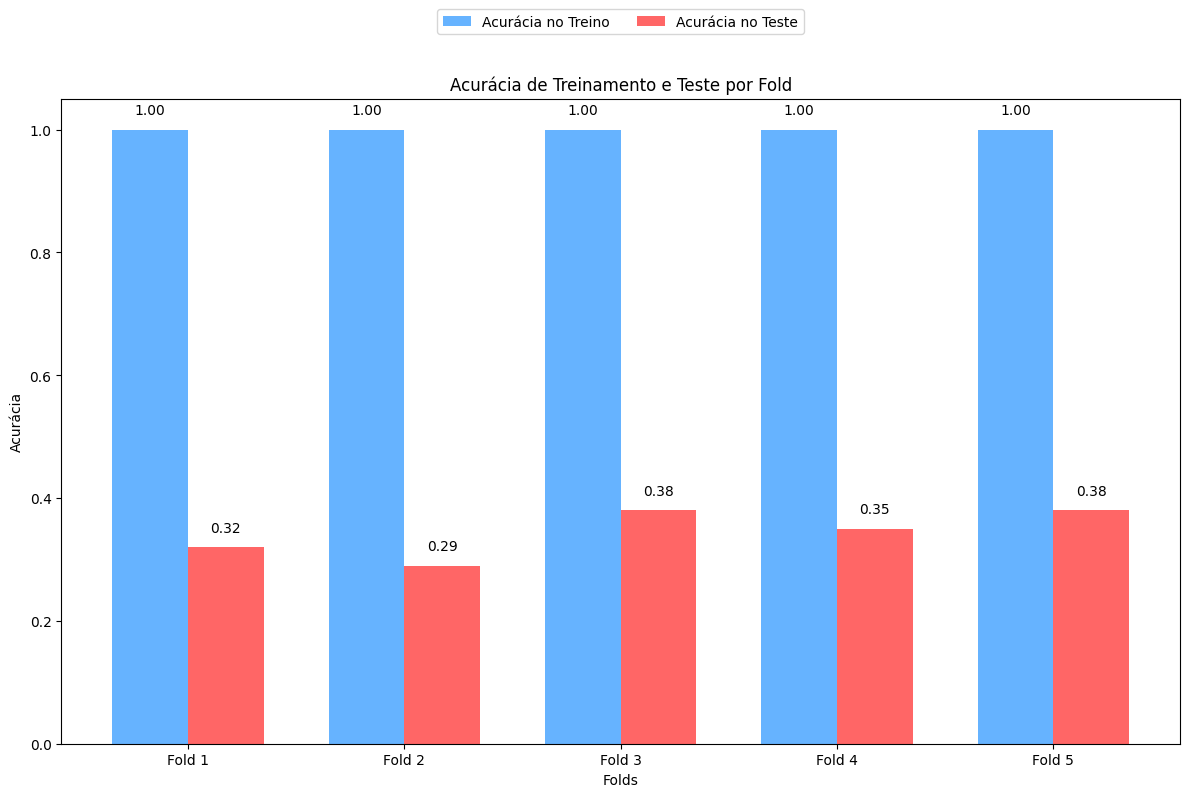

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de acurácia de treino e teste para cada fold
train_accuracy = [1.00, 1.00, 1.00, 1.00, 1.00]
test_accuracy = [0.32, 0.29, 0.38, 0.35, 0.38]

# Número de folds
folds = [f'Fold {i+1}' for i in range(5)]

# Criando o gráfico de barras
x = np.arange(len(folds))  # Localização dos rótulos (folds)
width = 0.35  # Largura das barras

# Plotando as barras para treino e teste
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, train_accuracy, width, label='Acurácia no Treino', color='#66b3ff')
bars2 = ax.bar(x + width/2, test_accuracy, width, label='Acurácia no Teste', color='#ff6666')

# Adicionando labels e título
ax.set_xlabel('Folds')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia de Treinamento e Teste por Fold')
ax.set_xticks(x)
ax.set_xticklabels(folds)

# Adicionando os valores das acurácias em cada barra
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Colocando a legenda na parte superior do gráfico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Ajustando as margens do gráfico para dar mais espaço no topo
plt.subplots_adjust(top=0.85)  # Aumenta o espaço na parte superior

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()






In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


# Número de épocas (iterações)
epochs = 10

# Armazenando as acurácias de treino e teste para cada época
train_accuracies = []
test_accuracies = []

# Treinando por múltiplas épocas
for epoch in range(epochs):
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Acurácia no treino
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)

    # Acurácia no teste
    test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Armazenando as acurácias
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Exibindo os resultados de cada época
    print(f'Época {epoch + 1}/{epochs} - Acurácia no treino: {train_accuracy:.2f} - Acurácia no teste: {test_accuracy:.2f}')

# Usando validação cruzada para obter uma média mais precisa
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Acurácia média com validação cruzada: {cv_scores.mean():.2f}')



Época 1/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 2/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 3/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 4/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 5/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 6/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 7/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 8/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 9/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Época 10/10 - Acurácia no treino: 0.49 - Acurácia no teste: 0.40
Acurácia média com validação cruzada: 0.34


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()


In [ ]:
# Realizar validação cruzada
cv_scores = cross_val_score(knn_model, X, y, cv=5)
print(f'Acurácia média na validação cruzada: {cv_scores.mean():.2f}')

Acurácia média na validação cruzada: 0.35


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
# Avaliar a acurácia no conjunto de treinamento
y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia no conjunto de treinamento: {train_accuracy:.2f}')

# Avaliar a acurácia no conjunto de teste
y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de treinamento: 0.63
Acurácia no conjunto de teste: 0.31


In [ ]:
epochs = 10
train_accuracies = []
test_accuracies = []
for _ in range(epochs):
    # Treinar o modelo final
    knn_model.fit(X_train, y_train)

    # Avaliar a acurácia no conjunto de treinamento
    y_train_pred = knn_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Avaliar a acurácia no conjunto de teste
    y_test_pred = knn_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f'Época {_+1}: Treinamento: {train_accuracy:.2f}, Teste: {test_accuracy:.2f}')

Época 1: Treinamento: 0.63, Teste: 0.31
Época 2: Treinamento: 0.63, Teste: 0.31
Época 3: Treinamento: 0.63, Teste: 0.31
Época 4: Treinamento: 0.63, Teste: 0.31
Época 5: Treinamento: 0.63, Teste: 0.31
Época 6: Treinamento: 0.63, Teste: 0.31
Época 7: Treinamento: 0.63, Teste: 0.31
Época 8: Treinamento: 0.63, Teste: 0.31
Época 9: Treinamento: 0.63, Teste: 0.31
Época 10: Treinamento: 0.63, Teste: 0.31


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X, y)

print(f'Melhores Hiperparâmetros: {grid_search.best_params_}')
print(f'Melhor Acurácia: {grid_search.best_score_:.2f}')

Melhores Hiperparâmetros: {'metric': 'manhattan', 'n_neighbors': 3}
Melhor Acurácia: 0.36
